In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [3]:
# Load and preprocess
data = pd.read_csv("train.csv")
data = data.drop(columns=['id', 'timestamp','country'])

# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

#Handling null values in categorical columns
data = data.dropna()

#FEATURE ENCODING - binary and categorical into numerical, standardize numerical
data_train = data.copy()

num_cols = ['job_years','hours_per_week','telecommute_days_per_week'] #standaridize numeric features
scaler = StandardScaler()
scaler.fit(data_train[num_cols])
data_train[num_cols] = scaler.transform(data_train[num_cols])

binary_cols = ['is_manager', 'certifications'] #encode binary variables
for c in binary_cols: 
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' # select categorical features
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]

final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int) #create dummy variables from categorical features
final_data


,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,0.152655,1,-0.488303,-0.626284,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0.261167,0,-0.488303,2.404834,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,-1.747663,0,-0.488303,-0.626284,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-1.747663,0,-0.488303,0.586163,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.743248,0,-0.488303,0.586163,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,-1.245455,1,-0.488303,-0.626284,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,-0.170333,1,-0.488303,-0.626284,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,0.261167,0,-0.488303,-0.626284,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,-0.241041,1,-0.488303,0.586163,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [6]:
#Train/Test Split
y = final_data['salary'] 
X = final_data.drop(columns=['salary']) #Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)


Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [8]:
#Linear Regression - TRAIN
reg=LinearRegression()
reg.fit(X_train, y_train)

actual_salary = y_train
predicted_salary = reg.predict(X_train)

mae_train = mean_absolute_error(actual_salary,predicted_salary)
mse_train = mean_squared_error(actual_salary,predicted_salary)**0.5

print(mae_train)
print(mse_train)

864.6233202947791
1226.6590946019253


In [9]:
#Question 1 - get predictions for test data based on the linear regression model trained on training data
predicted_salary_test = reg.predict(X_test)
actual_salary_test = y_test

#Question 2
mae_test = mean_absolute_error(actual_salary_test,predicted_salary_test)
mse_test = mean_squared_error(actual_salary_test,predicted_salary_test)**0.5

print(mae_test)
print(mse_test)

849.0845588015169
1192.2105205364826


In [13]:
#Question 3
reg_Ridge=Ridge(alpha=1)
reg_Ridge.fit(X_train, y_train)

reg_Lasso=Lasso(alpha=1)
reg_Lasso.fit(X_train, y_train)

predicted_salary_ridge = reg_Ridge.predict(X_test)
predicted_salary_lasso = reg_Lasso.predict(X_test)
actual_salary_test = y_test

mae_ridge = mean_absolute_error(actual_salary_test,predicted_salary_ridge)
mae_lasso = mean_absolute_error(actual_salary_test,predicted_salary_lasso)

mse_ridge = mean_squared_error(actual_salary_test,predicted_salary_ridge)**0.5
mse_lasso = mean_squared_error(actual_salary_test,predicted_salary_lasso)**0.5

print("Ridge\n")
print(mae_ridge)
print(mse_ridge)

print("\nLasso\n")
print(mae_lasso)
print(mse_lasso)

Ridge

849.1372350349668
1192.532653415714

Lasso

849.1378121772135
1192.8711248085106


In [15]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

#Question 4 - test error
print(mean_absolute_error(y_test,decisiontree.predict(X_test)))
print(mean_absolute_error(y_test,randomf.predict(X_test)))



859.6036177567186
781.2346270918273


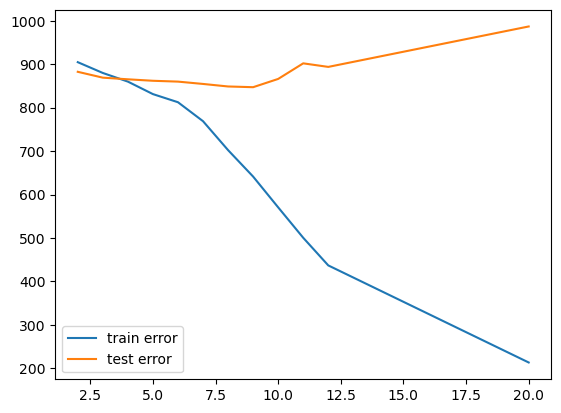

In [60]:
#QUESTION 5
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

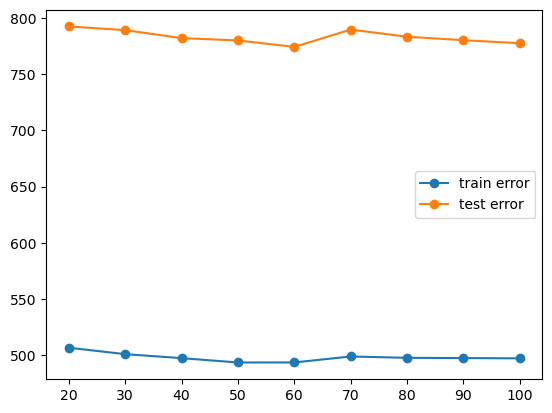

In [62]:
#QUESTION 5
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()